In [55]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.colors as mcolors


In [58]:
def get_team_logo(team_abbr):
    current_dir = os.getcwd()
    logo_dir = os.path.join(current_dir,'logos')
    file_path = os.path.join(logo_dir,team_abbr+'.png')
    return file_path

def interpolate_color(low_color, high_color, val, min_val, max_val):
    fraction = (val - min_val) / (max_val - min_val)
    low_color_rgba = np.array(mcolors.to_rgba(low_color))
    high_color_rgba = np.array(mcolors.to_rgba(high_color))
    color = low_color_rgba * (1 - fraction) + high_color_rgba * fraction
    return mcolors.to_hex(color)


In [23]:
file_path = '2023/plots/stats'
csv_files = [f for f in os.listdir(file_path) if f.endswith('.csv')]

dataframes = {}

for csv in csv_files:
    full_path = os.path.join(file_path, csv)
    df_name = os.path.splitext(csv)[0]  
    dataframes[df_name] = pd.read_csv(full_path)
    print(f"Loaded {df_name} with {len(dataframes[df_name])} rows")

Loaded kick_df1 with 50 rows
Loaded output with 32 rows
Loaded passing_df with 32 rows
Loaded passing_of with 32 rows
Loaded pass_df with 100 rows
Loaded rec_df with 100 rows
Loaded rec_rec_per_gp_df with 100 rows
Loaded rushing_df with 32 rows
Loaded rushing_of with 32 rows
Loaded rush_df with 100 rows
Loaded rush_yd_per_gp_df with 100 rows
Loaded score_df with 150 rows


In [24]:
passing_def = dataframes['passing_df']

In [25]:
passing_def.head()

,Team,Att,Cmp,Cmp %,Yds/Att,Yds,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck
0,ARI,506,347,68.6,7.6,3846,32,11,102.9,198,39.1,49,10,63T,33
1,ATL,549,340,61.9,6.8,3707,24,8,90.3,183,33.3,49,6,61T,42
2,BAL,634,384,60.6,5.9,3717,18,18,74.6,175,27.6,46,6,71T,60
3,BUF,552,363,65.8,6.7,3676,18,18,81.9,183,33.2,44,1,48,54
4,CAR,481,309,64.2,6.5,3109,19,8,88.8,162,33.7,39,9,75T,27


In [26]:
rushing_def = dataframes['rushing_df']

In [27]:
rushing_def.head()

,Team,Att,Rush Yds,YPC,TD,20+,40+,Lng,Rush 1st,Rush 1st%,Rush FUM
0,ARI,521,2434,4.7,19,12,1,56,141,27.1,4
1,ATL,499,2009,4.0,11,14,0,38,105,21.0,9
2,BAL,415,1860,4.5,6,10,3,63,96,23.1,4
3,BUF,409,1880,4.6,14,13,2,83,96,23.5,4
4,CAR,508,2081,4.1,25,12,3,62T,122,24.0,4


In [28]:
total_defense = pd.merge(passing_def, rushing_def, on='Team')


In [29]:
total_defense.columns

Index(['Team', 'Att_x', 'Cmp', 'Cmp %', 'Yds/Att', 'Yds', 'TD_x', 'INT',
       'Rate', '1st', '1st%', '20+_x', '40+_x', 'Lng_x', 'Sck', 'Att_y',
       'Rush Yds', 'YPC', 'TD_y', '20+_y', '40+_y', 'Lng_y', 'Rush 1st',
       'Rush 1st%', 'Rush FUM'],
      dtype='object')

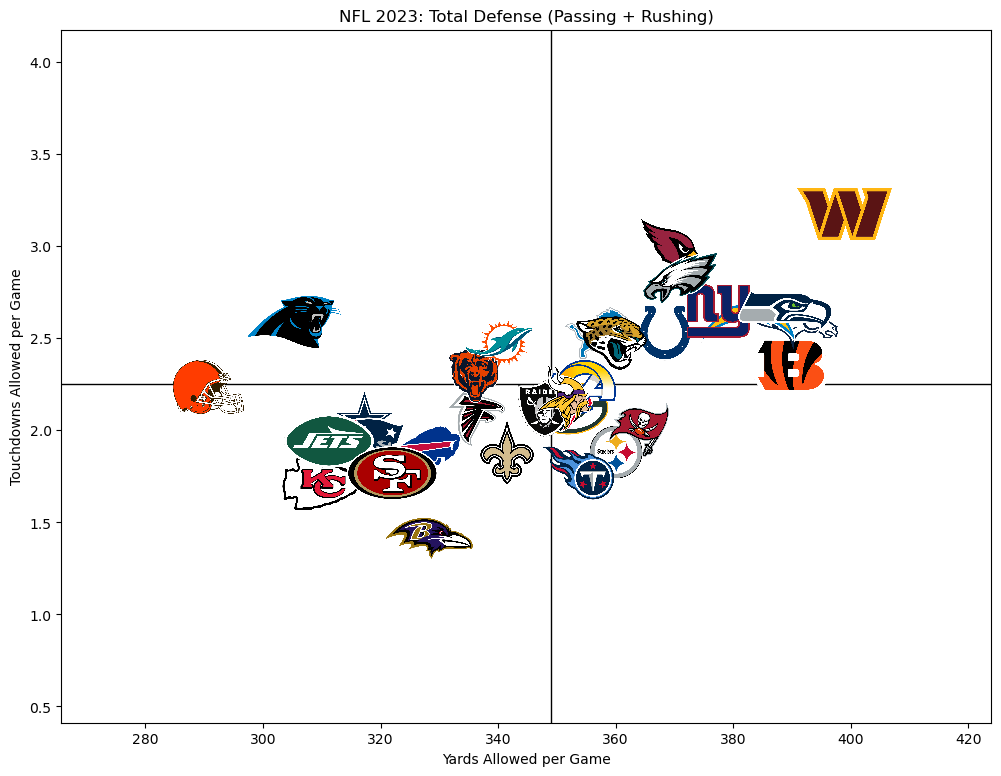

In [43]:
total_defense['TYDS/G'] = (total_defense['Yds'].astype('float') + total_defense['Rush Yds'].astype('float')) / 17
total_defense['TDs/G'] = (total_defense['TD_x'].astype('float') + total_defense['TD_y'].astype('float')) / 17

fig, ax = plt.subplots(figsize=(12, 9))

zoom = 0.05

for i, team in enumerate(total_defense['Team']):
    logo_url = get_team_logo(team)
    img = plt.imread(logo_url)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (total_defense['TYDS/G'][i], total_defense['TDs/G'][i]), frameon=False)
    ax.add_artist(ab)

x_mean = total_defense['TYDS/G'].mean()
y_mean = total_defense['TDs/G'].mean()
ax.axvline(x=x_mean, color='black', linestyle='solid', linewidth=1)
ax.axhline(y=y_mean, color='black', linestyle='solid', linewidth=1)
#ax.text(x_mean + 40, y_mean + 1, 'Elite Defense \n Give up very few Yds and TDs', color='black')
#ax.text(x_mean - 40, y_mean + 1, 'Quadrant II', color='blue', horizontalalignment='right')
#ax.text(x_mean - 40, y_mean - 1, 'Quadrant III', color='blue', horizontalalignment='right', verticalalignment='top')
#ax.text(x_mean + 40, y_mean - 1, 'Quadrant IV', color='blue', verticalalignment='top')

ax.set_xlabel('Yards Allowed per Game')
ax.set_ylabel('Touchdowns Allowed per Game')
ax.set_title('NFL 2023: Total Defense (Passing + Rushing)')

plt.xlim(total_defense['TYDS/G'].min() - 25, total_defense['TYDS/G'].max() + 25)
plt.ylim(total_defense['TDs/G'].min() - 1, total_defense['TDs/G'].max() + 1)
#plt.savefig('logos.png', dpi=450)
plt.show()

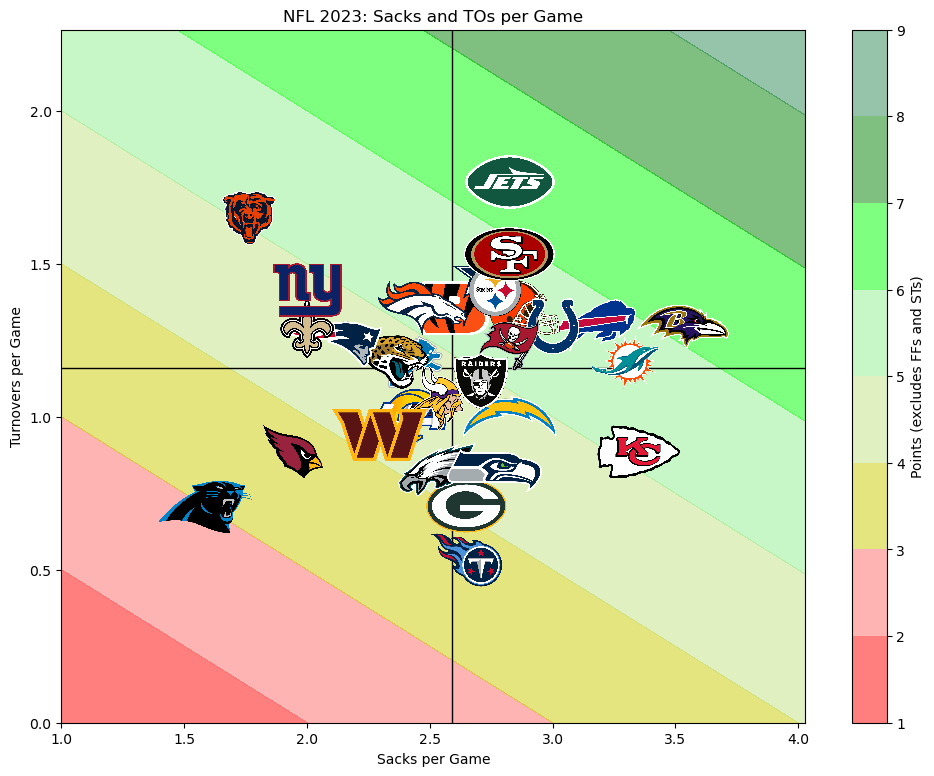

In [83]:
total_defense['TOs/G'] = (total_defense['INT'].astype('float') + total_defense['Rush FUM'].astype('float')) / 17
total_defense['Sck/G'] = total_defense['Sck'].astype('float') / 17

x = np.linspace(total_defense['Sck/G'].min() - 1, total_defense['Sck/G'].max() + 1, 100)
y = np.linspace(total_defense['TOs/G'].min() - 1, total_defense['TOs/G'].max() + 1, 100)
X, Y = np.meshgrid(x, y)
Z = 2 * Y + X

colors = [
    "#FF0000",  # Pure Red
    "#FF6B6B",  # Light Red
    "#CCCC00",  # Olive Yellow
    "#C5E384",  # Gold (Variant of Yellow, kept for comparison)
    "#90EE90",  # Light Green
    "#00FF00", 
    "#008000",
    "seagreen" 
]

fig, ax = plt.subplots(figsize=(12, 9))

zoom = 0.05

for i, team in enumerate(total_defense['Team']):
    logo_url = get_team_logo(team)
    img = plt.imread(logo_url)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (total_defense['Sck/G'][i], total_defense['TOs/G'][i]), frameon=False)
    ax.add_artist(ab)

x_mean = total_defense['Sck/G'].mean()
y_mean = total_defense['TOs/G'].mean()
ax.axvline(x=x_mean, color='black', linestyle='solid', linewidth=1)
ax.axhline(y=y_mean, color='black', linestyle='solid', linewidth=1)
cf = ax.contourf(X, Y, Z, levels=np.arange(1, 9.1, 1), colors=colors, alpha=0.5)
plt.colorbar(cf, ax=ax, label='Points (excludes FFs and STs)', orientation='vertical')


ax.set_xlabel('Sacks per Game')
ax.set_ylabel('Turnovers per Game')
ax.set_title('NFL 2023: Sacks and TOs per Game')

plt.xlim(1, total_defense['Sck/G'].max() + 0.5)
plt.ylim(0, total_defense['TOs/G'].max() + 0.5)
#plt.savefig('logos.png', dpi=450)
plt.show()